In [50]:
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 9.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 12.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Importing necessary libraries

In [51]:
# For EDA & Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For Machine Learning
from sklearn.preprocessing import OneHotEncoder
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")


In [ ]:
# reading the csv file
df=pd.read_csv('HousePricePrediction.csv')
df.shape
df.head()

(2919, 13)

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


# Data Preprocessing

In [ ]:
obj = (df.dtypes == 'object')
obj_var = list(obj[obj].index)
print(f"No. of categorical features : {len(obj_var)}")

No. of categorical features : 4


In [25]:
integer = (df.dtypes == 'int')
int_var = list(integer[integer].index)
print(f"No. of integer features : {len(int_var)}")

No. of integer features : 6


In [26]:
floating = (df.dtypes == 'float')
float_var = list(floating[floating].index)
print(f"No. of float features : {len(float_var)}")

No. of float features : 3


In [27]:
data = df.copy()
data.shape

(2919, 13)

In [28]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

<Axes: >

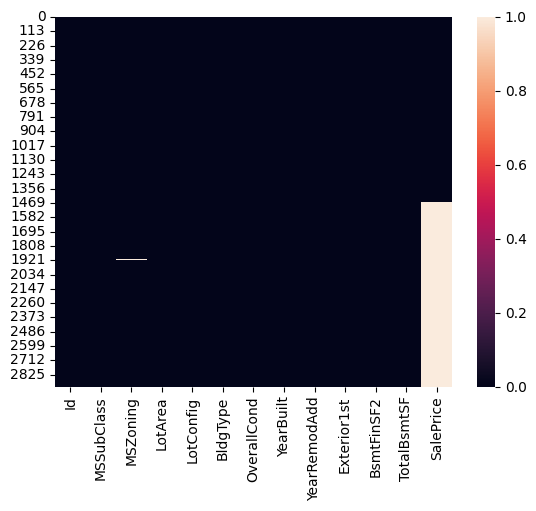

In [30]:
sns.heatmap(data.isnull())

## This shows we have below features which have null values - Numerical features (BsmtFinSF2,TotalBsmtSF,SalePrice) and categorical features (MSZoning, Exterior1st)

In [35]:
data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].median(),inplace=True)

In [36]:
data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].median(),inplace=True)

In [38]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].median())

In [43]:
new_df = data.dropna()

In [44]:
new_df.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [45]:
new_df.shape

(2914, 13)

In [47]:
# Now, we will handle categorical features 
obj = (data.dtypes == 'object')
obj_var = list(obj[obj].index)
print(f"No. of categorical features : {obj_var}")

No. of categorical features : ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


In [64]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_cols = pd.DataFrame(encoder.fit_transform(new_df[obj_var]))
one_hot_cols.index = new_df.index
one_hot_columns = encoder.get_feature_names_out()
df_final = new_df.drop(obj_var, axis=1)
df_final = pd.concat([df_final, one_hot_cols], axis=1)

# Exploratory Data Analysis

In [69]:
plt.figure(figsize=(13,7))
sns.heatmap(new_df.corr(),cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

ValueError: could not convert string to float: 'RL'

<Figure size 1300x700 with 0 Axes>

[6, 5, 5, 16]


<Axes: >

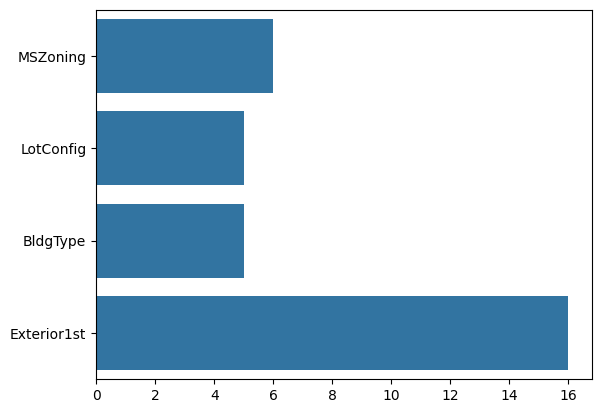

In [73]:
unique_cols_cat = []
for col in obj_var:
    unique_cols_cat.append(df[col].unique().size)
print(unique_cols_cat)
sns.barplot(x=unique_cols_cat, y=obj_var)

<Axes: >

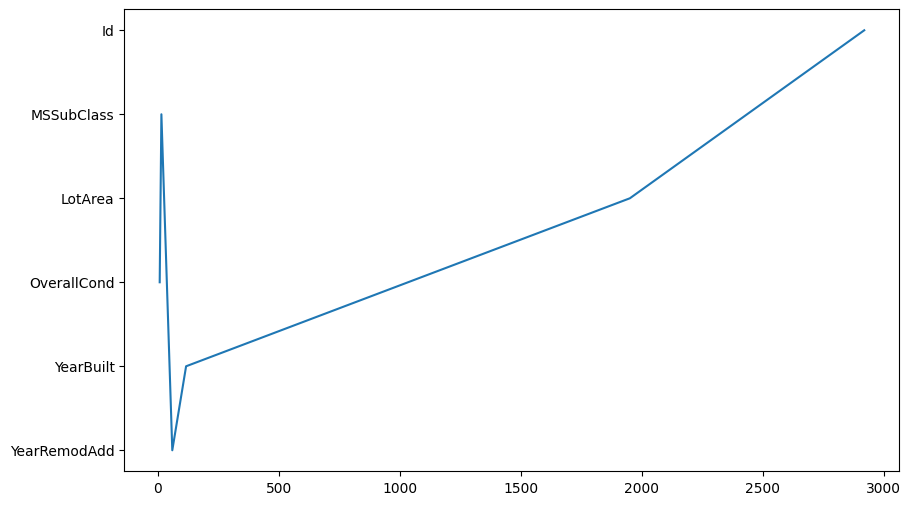

In [76]:
unique_cols_float = []
for col in int_var:
    unique_cols_float.append(df[col].unique().size)
plt.figure(figsize=(10,6))
sns.lineplot(x=unique_cols_float, y=int_var)